<a href="https://www.kaggle.com/code/adnanzamanniloy/student-performance-in-exam?scriptVersionId=248744386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# We explore different types of ML problems using this dataset to gain useful educational insights
## 1. Regression Task — Predict a Score

- **Goal**: Predict a student's **math score** based on the other features.  
- **Model Type**: Regression  



### Load the data

In [2]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv") 
print(df.head())
print(df.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

### Check for missing values 

In [3]:
print(df.isnull().sum())
df.columns = df.columns.str.replace(" ", "_")# replaces spaces with underscores

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### Distribution of math scores

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


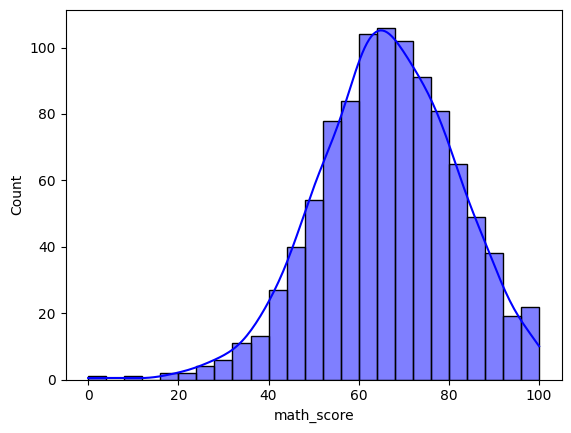

In [4]:
sns.histplot(df['math_score'],color='blue', kde=True)
plt.show()

### Compare math score by gender

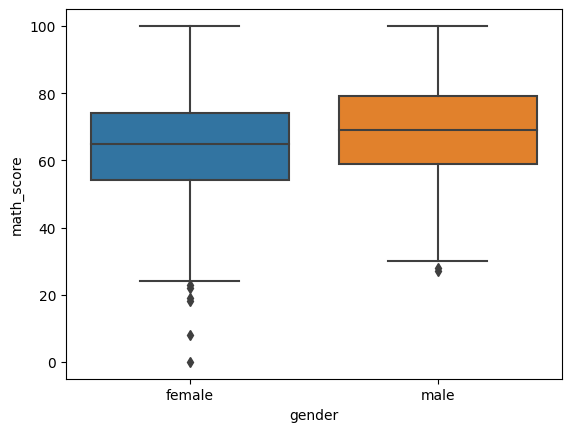

In [5]:
sns.boxplot(x='gender',y='math_score',data= df)
plt.show()

# Preprocessing for Regression
### Encode categorical variables


In [6]:
df_encoded = pd.get_dummies(df.drop(['math_score'], axis=1), drop_first=True)

# Create features and target
X = df_encoded
y = df['math_score']



### Train-Test Split

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Regression Model(LinearRegression)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluate the Model


In [9]:
y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² score:", r2_score(y_test, y_pred))

RMSE: 5.393993869732843
R² score: 0.8804332983749564


### We can use another regression model like RandomForestRegressor

In [10]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² score:", r2_score(y_test, y_pred))


RMSE: 6.057693992701514
R² score: 0.8491990721184489


### We can see Linear Regression performed better on this dataset — both in terms of accuracy (R²) and error (RMSE).Because the relationship between features and math score might be fairly linear, so Linear Regression is doing just fine. Our math score prediction is done.


#  Lets do Classification Task — Pass/Fail Prediction
- **Create a new column**:**passed_math = 1 if math score ≥ 40 else 0**

- **Goal**: Predict if a student will **pass or fail** in math.  
- **Model Type**: Binary Classification

In [12]:
df['passed_math'] = df['math_score'].apply(lambda x: 1 if x >= 40 else 0)
df = df.drop(['math_score'], axis=1)
X = pd.get_dummies(df.drop('passed_math', axis=1), drop_first=True)
y = df['passed_math']
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.99
[[  9   2]
 [  0 189]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.99      1.00      0.99       189

    accuracy                           0.99       200
   macro avg       0.99      0.91      0.95       200
weighted avg       0.99      0.99      0.99       200

